In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense

import cv2
import pandas as pd
import dlib

In [27]:
for i in range(500):
    globals()['land'+str(i)] = pd.read_csv('./dlib500/train/%s.csv'%i)
    globals()['land'+str(i)] = np.array(globals()['land'+str(i)])
    
    tr_x = globals()['land'+str(i)][:, 0]
    tr_y = globals()['land'+str(i)][:, 1]
    
    tr_cx = ((min(tr_x)+max(tr_x)) / 2)        #dlib_rect 중점
    tr_cy = ((min(tr_y)+max(tr_y)) / 2)
    
    tr_h = max(tr_y)-min(tr_y)    #종축 길이
    
    tr_x -= tr_cx
    tr_y -= tr_cy
    
    norm_trx = (tr_x - min(tr_x)) / (tr_h * 1.5)
    norm_try = (tr_y - min(tr_y)) / (tr_h *1.5)
    
    globals()['train_norm'+str(i)] = np.column_stack((norm_trx, norm_try))

In [28]:
## eye, nose, mouth, jaws
for i in  range(500):
    globals()['norm_eye'+str(i)] = globals()['train_norm'+str(i)][36:48].flatten()
    globals()['norm_nose'+str(i)] = globals()['train_norm'+str(i)][27:36].flatten()
    globals()['norm_mouth'+str(i)] = globals()['train_norm'+str(i)][48:].flatten()
    globals()['norm_jaws'+str(i)] = globals()['train_norm'+str(i)][:17].flatten()

In [29]:
train_x = np.zeros((500, len(norm_eye0)))   #eye
for i in range(500):
    for j in range(len(norm_eye0)):
        train_x[i][j] = globals()['norm_eye'+str(i)][j]   

In [30]:
try_eye = pd.read_csv('./DataSet500/train/csv/train.csv')
try_eye = try_eye.iloc[:, 19]

In [31]:
for i in range(500):
    globals()['mark'+str(i)] = pd.read_csv('./dlib500/test/%s.csv'%i)
    globals()['mark'+str(i)] = np.array(globals()['mark'+str(i)])
    
    te_x = globals()['mark'+str(i)][:, 0]
    te_y = globals()['mark'+str(i)][:, 1]
    
    te_cx = ((min(te_x)+max(te_x)) / 2)
    te_cy = ((min(te_y)+max(te_y)) / 2)

    te_h = max(te_y)-min(te_y)
    
    
    te_x -= te_cx
    te_y -= te_cy

    norm_tex = (te_x - min(te_x)) / (te_h *1.5)
    norm_tey = (te_y - min(te_y)) / (te_h *1.5)
    
    globals()['test_norm'+str(i)] = np.column_stack((norm_tex, norm_tey))

In [32]:
## eye, nose, mouth, jaws
for i in  range(500):
    globals()['norm_eye2'+str(i)] = globals()['test_norm'+str(i)][36:48].flatten()
    globals()['norm_nose2'+str(i)] = globals()['test_norm'+str(i)][27:36].flatten()
    globals()['norm_mouth2'+str(i)] = globals()['test_norm'+str(i)][48:].flatten()
    globals()['norm_jaws2'+str(i)] = globals()['test_norm'+str(i)][:17].flatten()

In [33]:
test_x = np.zeros((500, len(norm_eye20)))
for i in range(500):
    for j in range(len(norm_eye20)):
        test_x[i][j] = globals()['norm_eye2'+str(i)][j]  

In [34]:
tey_eye = pd.read_csv('./DataSet500/test/csv/test.csv')
tey_eye = tey_eye.iloc[:, 19]

In [35]:
np.random.seed(1)
tf.random.set_seed(1)

learning_rate = 0.005
N_EPOCHS = 600
N_BATCH = 32

In [36]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, try_eye))\
                                .shuffle(500)\
                                .batch(N_BATCH, drop_remainder=True)\
                                .repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, tey_eye)).batch(N_BATCH)

In [37]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=16, activation='relu', input_shape=(24,)))
#     model.add(keras.layers.Dense(units=8, activation='relu'))
    model.add(keras.layers.Dense(units=4, activation='relu'))
    model.add(keras.layers.Dense(units=1))
    
    return model

In [38]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                400       
                                                                 
 dense_9 (Dense)             (None, 4)                 68        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 473
Trainable params: 473
Non-trainable params: 0
_________________________________________________________________


In [40]:
steps_per_epoch = train_x.shape[0]
validation_steps = int(np.ceil(test_x.shape[0]/N_BATCH))

In [41]:
history = model.fit(train_dataset,
                   epochs=N_EPOCHS,
                   steps_per_epoch=steps_per_epoch,
                   validation_data = test_dataset,
                   validation_steps = validation_steps)

Epoch 1/600
500/500 [==============================] - 1s 669us/step - loss: 0.0798 - val_loss: 0.0810
Epoch 2/600
500/500 [==============================] - 0s 599us/step - loss: 0.0776 - val_loss: 0.0789
Epoch 3/600
500/500 [==============================] - 0s 587us/step - loss: 0.0756 - val_loss: 0.0827
Epoch 4/600
500/500 [==============================] - 0s 579us/step - loss: 0.0712 - val_loss: 0.0743
Epoch 5/600
500/500 [==============================] - 0s 583us/step - loss: 0.0652 - val_loss: 0.0646
Epoch 6/600
500/500 [==============================] - 0s 583us/step - loss: 0.0585 - val_loss: 0.0567
Epoch 7/600
500/500 [==============================] - 0s 579us/step - loss: 0.0501 - val_loss: 0.0478
Epoch 8/600
500/500 [==============================] - 0s 583us/step - loss: 0.0465 - val_loss: 0.0588
Epoch 9/600
500/500 [==============================] - 0s 575us/step - loss: 0.0436 - val_loss: 0.0425
Epoch 10/600
500/500 [==============================] - 0s 579us/step - l

Epoch 80/600
500/500 [==============================] - 0s 581us/step - loss: 0.0369 - val_loss: 0.0373
Epoch 81/600
500/500 [==============================] - 0s 571us/step - loss: 0.0364 - val_loss: 0.0386
Epoch 82/600
500/500 [==============================] - 0s 569us/step - loss: 0.0358 - val_loss: 0.0375
Epoch 83/600
500/500 [==============================] - 0s 573us/step - loss: 0.0360 - val_loss: 0.0373
Epoch 84/600
500/500 [==============================] - 0s 585us/step - loss: 0.0368 - val_loss: 0.0436
Epoch 85/600
500/500 [==============================] - 0s 575us/step - loss: 0.0368 - val_loss: 0.0383
Epoch 86/600
500/500 [==============================] - 0s 593us/step - loss: 0.0360 - val_loss: 0.0383
Epoch 87/600
500/500 [==============================] - 0s 573us/step - loss: 0.0360 - val_loss: 0.0416
Epoch 88/600
500/500 [==============================] - 0s 583us/step - loss: 0.0365 - val_loss: 0.0444
Epoch 89/600
500/500 [==============================] - 0s 573us

500/500 [==============================] - 0s 577us/step - loss: 0.0356 - val_loss: 0.0372
Epoch 159/600
500/500 [==============================] - 0s 575us/step - loss: 0.0356 - val_loss: 0.0371
Epoch 160/600
500/500 [==============================] - 0s 571us/step - loss: 0.0359 - val_loss: 0.0426
Epoch 161/600
500/500 [==============================] - 0s 573us/step - loss: 0.0354 - val_loss: 0.0384
Epoch 162/600
500/500 [==============================] - 0s 575us/step - loss: 0.0352 - val_loss: 0.0371
Epoch 163/600
500/500 [==============================] - 0s 577us/step - loss: 0.0351 - val_loss: 0.0377
Epoch 164/600
500/500 [==============================] - 0s 571us/step - loss: 0.0357 - val_loss: 0.0393
Epoch 165/600
500/500 [==============================] - 0s 569us/step - loss: 0.0352 - val_loss: 0.0369
Epoch 166/600
500/500 [==============================] - 0s 569us/step - loss: 0.0354 - val_loss: 0.0395
Epoch 167/600
500/500 [==============================] - 0s 572us/ste

500/500 [==============================] - 0s 573us/step - loss: 0.0346 - val_loss: 0.0380
Epoch 237/600
500/500 [==============================] - 0s 601us/step - loss: 0.0353 - val_loss: 0.0398
Epoch 238/600
500/500 [==============================] - 0s 605us/step - loss: 0.0357 - val_loss: 0.0408
Epoch 239/600
500/500 [==============================] - 0s 615us/step - loss: 0.0346 - val_loss: 0.0366
Epoch 240/600
500/500 [==============================] - 0s 583us/step - loss: 0.0347 - val_loss: 0.0374
Epoch 241/600
500/500 [==============================] - 0s 585us/step - loss: 0.0346 - val_loss: 0.0370
Epoch 242/600
500/500 [==============================] - 0s 591us/step - loss: 0.0356 - val_loss: 0.0369
Epoch 243/600
500/500 [==============================] - 0s 581us/step - loss: 0.0344 - val_loss: 0.0376
Epoch 244/600
500/500 [==============================] - 0s 605us/step - loss: 0.0351 - val_loss: 0.0368
Epoch 245/600
500/500 [==============================] - 0s 585us/ste

500/500 [==============================] - 0s 575us/step - loss: 0.0340 - val_loss: 0.0387
Epoch 315/600
500/500 [==============================] - 0s 579us/step - loss: 0.0340 - val_loss: 0.0373
Epoch 316/600
500/500 [==============================] - 0s 582us/step - loss: 0.0343 - val_loss: 0.0439
Epoch 317/600
500/500 [==============================] - 0s 573us/step - loss: 0.0351 - val_loss: 0.0372
Epoch 318/600
500/500 [==============================] - 0s 585us/step - loss: 0.0344 - val_loss: 0.0369
Epoch 319/600
500/500 [==============================] - 0s 587us/step - loss: 0.0344 - val_loss: 0.0366
Epoch 320/600
500/500 [==============================] - 0s 581us/step - loss: 0.0349 - val_loss: 0.0371
Epoch 321/600
500/500 [==============================] - 0s 579us/step - loss: 0.0338 - val_loss: 0.0366
Epoch 322/600
500/500 [==============================] - 0s 576us/step - loss: 0.0341 - val_loss: 0.0373
Epoch 323/600
500/500 [==============================] - 0s 581us/ste

500/500 [==============================] - 0s 579us/step - loss: 0.0348 - val_loss: 0.0405
Epoch 393/600
500/500 [==============================] - 0s 571us/step - loss: 0.0341 - val_loss: 0.0367
Epoch 394/600
500/500 [==============================] - 0s 579us/step - loss: 0.0340 - val_loss: 0.0370
Epoch 395/600
500/500 [==============================] - 0s 591us/step - loss: 0.0347 - val_loss: 0.0369
Epoch 396/600
500/500 [==============================] - 0s 581us/step - loss: 0.0338 - val_loss: 0.0376
Epoch 397/600
500/500 [==============================] - 0s 577us/step - loss: 0.0337 - val_loss: 0.0419
Epoch 398/600
500/500 [==============================] - 0s 577us/step - loss: 0.0340 - val_loss: 0.0380
Epoch 399/600
500/500 [==============================] - 0s 569us/step - loss: 0.0347 - val_loss: 0.0367
Epoch 400/600
500/500 [==============================] - 0s 575us/step - loss: 0.0345 - val_loss: 0.0367
Epoch 401/600
500/500 [==============================] - 0s 575us/ste

500/500 [==============================] - 0s 583us/step - loss: 0.0341 - val_loss: 0.0379
Epoch 471/600
500/500 [==============================] - 0s 579us/step - loss: 0.0344 - val_loss: 0.0371
Epoch 472/600
500/500 [==============================] - 0s 583us/step - loss: 0.0337 - val_loss: 0.0369
Epoch 473/600
500/500 [==============================] - 0s 581us/step - loss: 0.0337 - val_loss: 0.0376
Epoch 474/600
500/500 [==============================] - 0s 587us/step - loss: 0.0333 - val_loss: 0.0371
Epoch 475/600
500/500 [==============================] - 0s 585us/step - loss: 0.0339 - val_loss: 0.0364
Epoch 476/600
500/500 [==============================] - 0s 571us/step - loss: 0.0338 - val_loss: 0.0403
Epoch 477/600
500/500 [==============================] - 0s 575us/step - loss: 0.0337 - val_loss: 0.0363
Epoch 478/600
500/500 [==============================] - 0s 581us/step - loss: 0.0342 - val_loss: 0.0366
Epoch 479/600
500/500 [==============================] - 0s 573us/ste

500/500 [==============================] - 0s 607us/step - loss: 0.0335 - val_loss: 0.0362
Epoch 549/600
500/500 [==============================] - 0s 597us/step - loss: 0.0333 - val_loss: 0.0384
Epoch 550/600
500/500 [==============================] - 0s 605us/step - loss: 0.0333 - val_loss: 0.0363
Epoch 551/600
500/500 [==============================] - 0s 575us/step - loss: 0.0337 - val_loss: 0.0389
Epoch 552/600
500/500 [==============================] - 0s 575us/step - loss: 0.0338 - val_loss: 0.0440
Epoch 553/600
500/500 [==============================] - 0s 583us/step - loss: 0.0335 - val_loss: 0.0369
Epoch 554/600
500/500 [==============================] - 0s 589us/step - loss: 0.0338 - val_loss: 0.0376
Epoch 555/600
500/500 [==============================] - 0s 591us/step - loss: 0.0335 - val_loss: 0.0368
Epoch 556/600
500/500 [==============================] - 0s 573us/step - loss: 0.0339 - val_loss: 0.0365
Epoch 557/600
500/500 [==============================] - 0s 579us/ste

In [42]:
model.evaluate(test_dataset)

history.history.keys()

16/16 [==============================] - 0s 600us/step - loss: 0.0370


dict_keys(['loss', 'val_loss'])

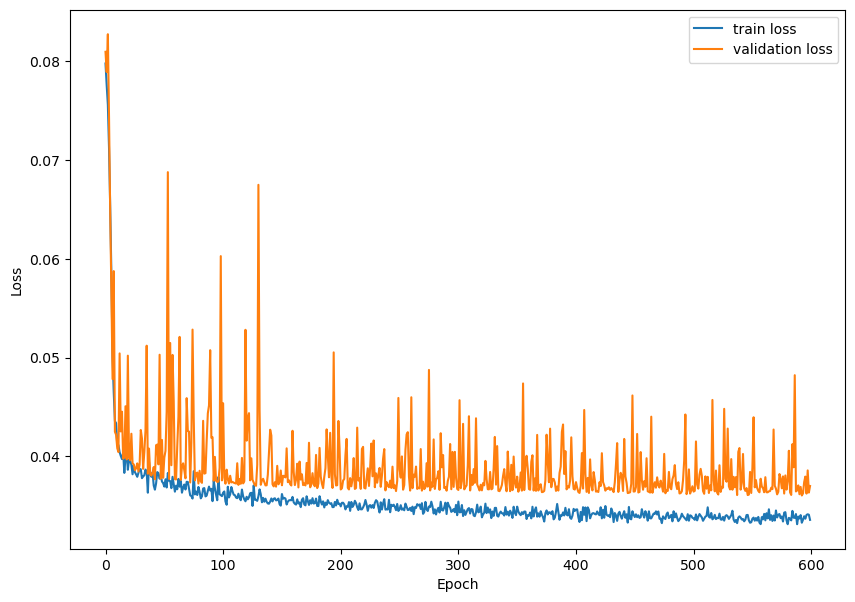

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
pred = model.predict(test_x)
df = pd.DataFrame(pred)
df

16/16 [==============================] - 0s 533us/step


,0
0,0.294309
1,0.660010
2,0.777985
3,0.485438
4,0.302487
...,...
495,0.492418
496,0.267415
497,0.954467
498,0.693553


In [63]:
tey_eye

0      0.073463
1      0.824888
2      0.726801
3      0.103462
4      0.479768
         ...   
495    0.838311
496    0.310638
497    0.997561
498    0.910411
499    0.904922
Name: eyeRotation, Length: 500, dtype: float64

In [64]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(tey_eye, pred)**0.5
print(rmse)

0.1977922989806681


In [65]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(tey_eye, pred)
print(mae)

0.1561286257749473
